# **Case Study for Statistical Methods**

In [1]:
# Import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
import statsmodels.multivariate as manova

# Chi-Squared Test

Assume the expected distribution is 50% vegetarian and 50% non-vegetarian. 
You want to test if your sample data matches this distribution.

Goodness of fit.

In [2]:
from scipy.stats import chisquare

observed_frequencies = np.array([30, 70])
total_meals = observed_frequencies.sum()
expected_frequencies = np.array([total_meals * 0.5, total_meals * 0.5])

chi2_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

print(f'Chi-Squared Statistics: {chi2_stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Chi-Squared Statistics: 16.0
P-value: 6.334248366623988e-05
Reject null hypothesis, there is a significant difference between the groups


In [3]:
from scipy.stats import chi2_contingency

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
contingency_table = pd.crosstab(df['sex'], df['day'])
contingency_table

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


In [5]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Squared Statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degree of Freedom: {dof}')
print(f'Expected: \n', np.array(expected))

if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")

Chi-Squared Statistic: 13.22200137240661
P-value: 0.004180302092822257
Degree of Freedom: 3
Expected: 
 [[39.89344262 12.22540984 55.9795082  48.90163934]
 [22.10655738  6.77459016 31.0204918  27.09836066]]
Reject null hypothesis, there is a significant difference between the groups


---
# t-test

## 1. one sample t-test

In [6]:
# one sample t-test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# data load
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

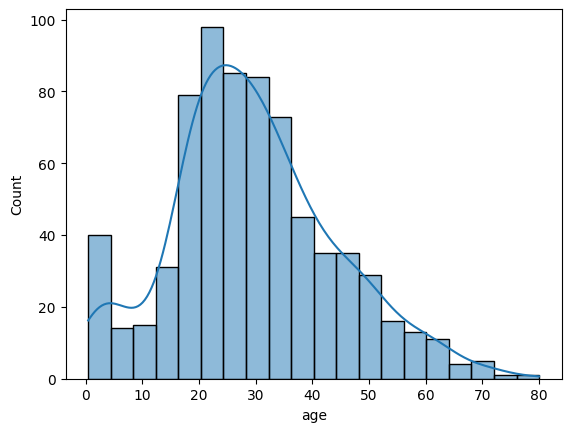

In [7]:
sns.histplot(df['age'], kde=True)

In [8]:
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

In [10]:
statistic, p = stats.shapiro(df['age'])

if p < 0.05:
    print("Reject null hypothesis, data is not normally distributed")
else:
    print("Fail to reject null hypothesis, data is normally distributed")

Reject null hypothesis, data is not normally distributed


#### **mu = 35**

is there any difference between ages of people and mu?

In [11]:
statistic, p = stats.ttest_1samp(df['age'], 35)

if p < 0.05:
    print("Reject null hypothesis, there is a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, there is no significant difference between the groups ")


Reject null hypothesis, there is a significant difference between the groups


## 2. Two sample independent t-test

In [13]:
age_male = df[df['sex'] == 'male']['age']
age_female = df[df['sex'] == 'female']['age']

statistic, p = stats.ttest_ind(age_male, age_female)

if p < 0.05:
    print(f"Reject null hypothesis, because p vaule: {p} , there is a significant difference between ages of male and female passengers of titanic.")
else:
    print(f"Fail to reject null hypothesis,because p vaule: {p}, there is not any differences between ages of female and male passengers.")

Reject null hypothesis, because p vaule: 0.015381536989875317 , there is a significant difference between ages of male and female passengers of titanic.


In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
# ANOVA

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# one-way ANOVA

## 1. There is a difference between ages of First, second and third class passengers?

H0: There is no difference.

H0: There is no difference.

In [17]:
df[['age', 'pclass']].head()

,age,pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("age ~ pclass", data = df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

if anova_table['PR(>F)'][0] < 0.05:
    print(f"Reject null hypothesis, because p vaule: {anova_table['PR(>F)'][0]} , there is a significant difference between ages of passengers in different classes.")
else:
    print(f"Fail to reject null hypothesis,because p vaule: {anova_table['PR(>F)'][0]}, there is not any differences between ages of passengers in different classes.")

                 sum_sq     df           F        PR(>F)
pclass     17429.695048    1.0  116.122704  1.558883e-25
Residual  133436.428421  889.0         NaN           NaN
Reject null hypothesis, because p vaule: 1.558882992663361e-25 , there is a significant difference between ages of passengers in different classes.


C:\Users\asada\AppData\Local\Temp\ipykernel_3516\612226582.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
C:\Users\asada\AppData\Local\Temp\ipykernel_3516\612226582.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Reject null hypothesis, because p vaule: {anova_table['PR(>F)'][0]} , there is a significant difference between ages of passengers in different classes.")


# PostHoc Test

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['age'], groups=df['pclass'], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-7.0467,0.0,-9.9299,-4.1636,True
1,3,-10.8795,0.0,-13.226,-8.533,True
2,3,-3.8328,0.0009,-6.3169,-1.3486,True


<Axes: xlabel='pclass', ylabel='age'>

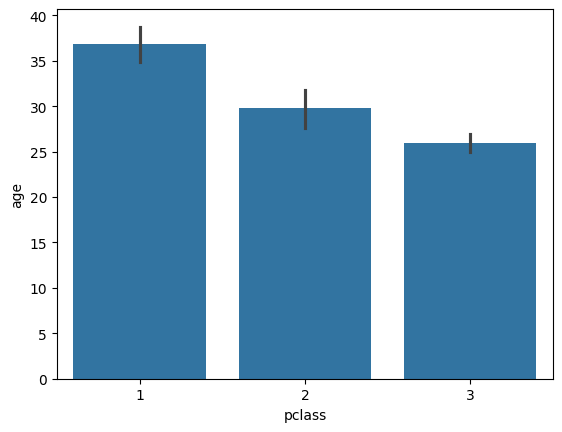

In [22]:
sns.barplot(x='pclass', y='age', data=df)

<Axes: xlabel='age', ylabel='Count'>

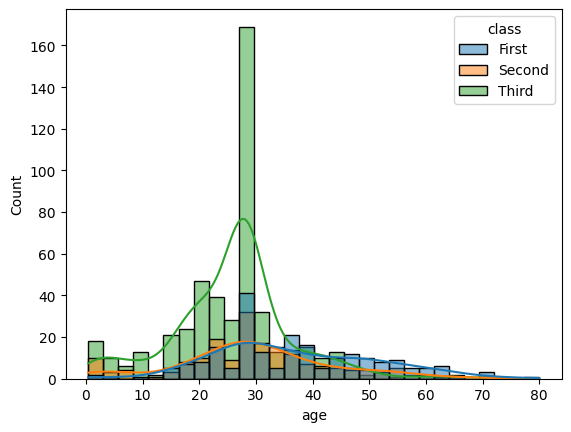

In [23]:
sns.histplot(df, x='age', hue='class', kde=True)

# TWO Way ANOVA

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('age ~ sex * who', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df             F        PR(>F)
sex                NaN    1.0           NaN           NaN
who      -8.956759e-13    2.0 -3.882441e-15  1.000000e+00
sex:who   5.233208e+04    2.0  2.268412e+02  8.119221e-46
Residual  1.023151e+05  887.0           NaN           NaN


c:\Users\asada\miniconda3\envs\python\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\Users\asada\miniconda3\envs\python\Lib\site-packages\statsmodels\base\model.py:1925: RuntimeWarning: invalid value encountered in divide
  F /= J
c:\Users\asada\miniconda3\envs\python\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [27]:
# tukey HSD pairwise comparison

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df['age'], df['sex'] + df['who'], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
femalechild,femalewoman,24.0084,0.0,19.4706,28.5462,True
femalechild,malechild,-1.7426,0.8815,-7.8152,4.3301,False
femalechild,maleman,24.7693,0.0,20.3881,29.1505,True
femalewoman,malechild,-25.751,0.0,-30.4333,-21.0686,True
femalewoman,maleman,0.7609,0.7773,-1.299,2.8207,False
malechild,maleman,26.5118,0.0,21.9811,31.0426,True


<Axes: xlabel='who', ylabel='age'>

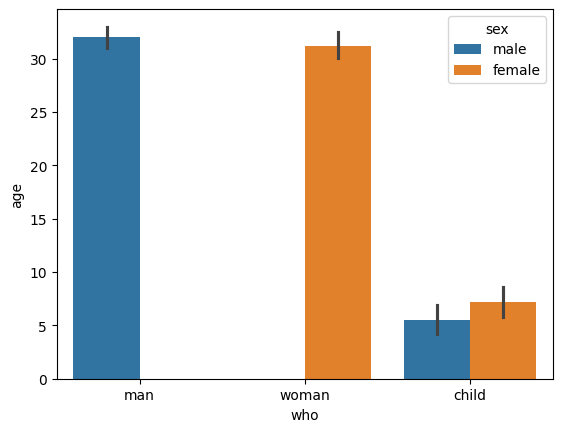

In [28]:
sns.barplot(df, x='who', y='age', hue='sex')

---
# Correlation

In [29]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

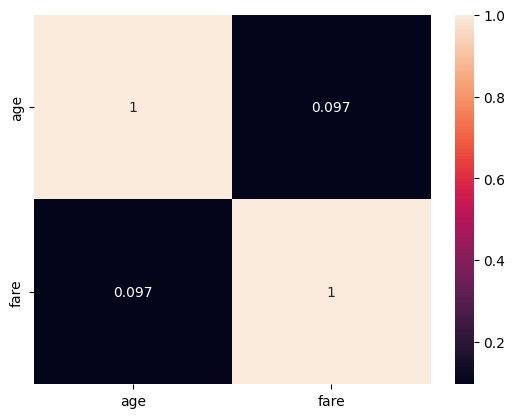

In [30]:
sns.heatmap(df[['age', 'fare']].corr(), annot=True)

In [32]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df['total_bill'].corr(df['tips'])

In [ ]:
sns.